<a href="https://colab.research.google.com/github/pratosh2004/Machine_Learning/blob/main/K_Means_From_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def intialize_centroids(X,k):
  indices= np.random.choice(len(X),k,replace=False)
  return X[indices]

In [ ]:
def assign_to_clusters(X,centroids):
  distances = np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
  return np.argmin(distances,axis=1)

In [ ]:
def update_centroids(X,labels,k):
  centroids= np.array([X[labels == i].mean(axis=0)for i in range(k)])
  return centroids

In [ ]:
def k_means(X,k,max_iters=100):
  centroids=intialize_centroids(X,k)
  for _ in range(max_iters):
    labels=assign_to_clusters(X,centroids)
    new_centroids = update_centroids(X,labels,k)

    if np.all(centroids == new_centroids):
      break
      centroids=new_centroids
  return labels, centroids

In [ ]:
np.random.seed(42)
X=np.concatenate([np.random.normal(loc=i,scale=1,size=(50,2)) for i in range(5)])

In [ ]:
k=5
labels,centroids = k_means(X,k)

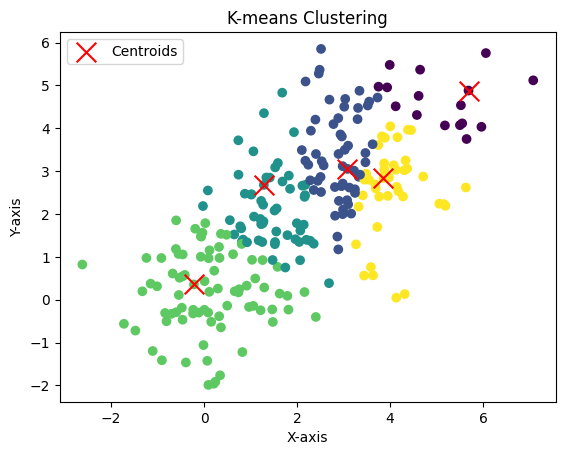

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,c='red',label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()